# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesn't work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Your code here
# Importing the dataset
og_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

# Taking a 100k sample
df = og_df.sample(100000, random_state = 18)

In [3]:
# Resetting the df's index
df.reset_index(drop = True, inplace = True)

# Taking a look at the data
display(df.head())

# Looking for nans
print(df.isna().sum())

# Looking at the data types
df.dtypes

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,275,CASH_OUT,286775.55,C1170450653,196006.43,0.00,C310304967,1161060.62,1447836.17,0,0
1,44,CASH_IN,468059.29,C312438161,1468755.32,1936814.61,C1549245257,2920874.74,2452815.45,0,0
2,355,CASH_IN,342704.27,C336299771,34050.00,376754.27,C975018686,1011735.16,669030.89,0,0
3,369,CASH_OUT,119722.55,C269572517,11287.00,0.00,C1861368953,4018330.88,4138053.43,0,0
4,349,CASH_OUT,224630.98,C1995819092,0.00,0.00,C266951582,763527.93,988158.91,0,0


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [78]:
# Checking the values in these columns
print(df['type'].value_counts(), '\n')

# This is incredibly imbalanced, which is to be expected, as most transactions are not fraudulent
print(df['isFraud'].value_counts())  # just checking the base values

CASH_OUT    35268
PAYMENT     33558
CASH_IN     22009
TRANSFER     8449
DEBIT         716
Name: type, dtype: int64 

0    99872
1      128
Name: isFraud, dtype: int64


In [5]:
# Getting some statistics
display(df.describe())

# Checking the correlation with 'isFraud' - seems to be the 'outcome' as this is a fraud detection dataset?
df.corr()[['isFraud']][:-2].sort_values('isFraud', ascending = False)
# well, there's like no correlation, apparently

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,242.674250,1.835076e+05,8.434431e+05,8.637713e+05,1.101361e+06,1.228447e+06,0.001280,0.0
std,141.896625,6.063339e+05,2.935567e+06,2.967133e+06,3.441579e+06,3.709417e+06,0.035754,0.0
min,1.000000,9.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.351495e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.523288e+04,1.404450e+04,0.000000e+00,1.358612e+05,2.182893e+05,0.000000,0.0
75%,334.000000,2.087471e+05,1.075570e+05,1.420635e+05,9.323198e+05,1.092548e+06,0.000000,0.0
max,732.000000,4.218381e+07,5.958504e+07,4.958504e+07,2.359895e+08,2.360463e+08,1.000000,0.0


,isFraud
amount,0.101058
step,0.030594
oldbalanceOrg,0.023513
newbalanceDest,0.009004
oldbalanceDest,0.001217
newbalanceOrig,0.000153


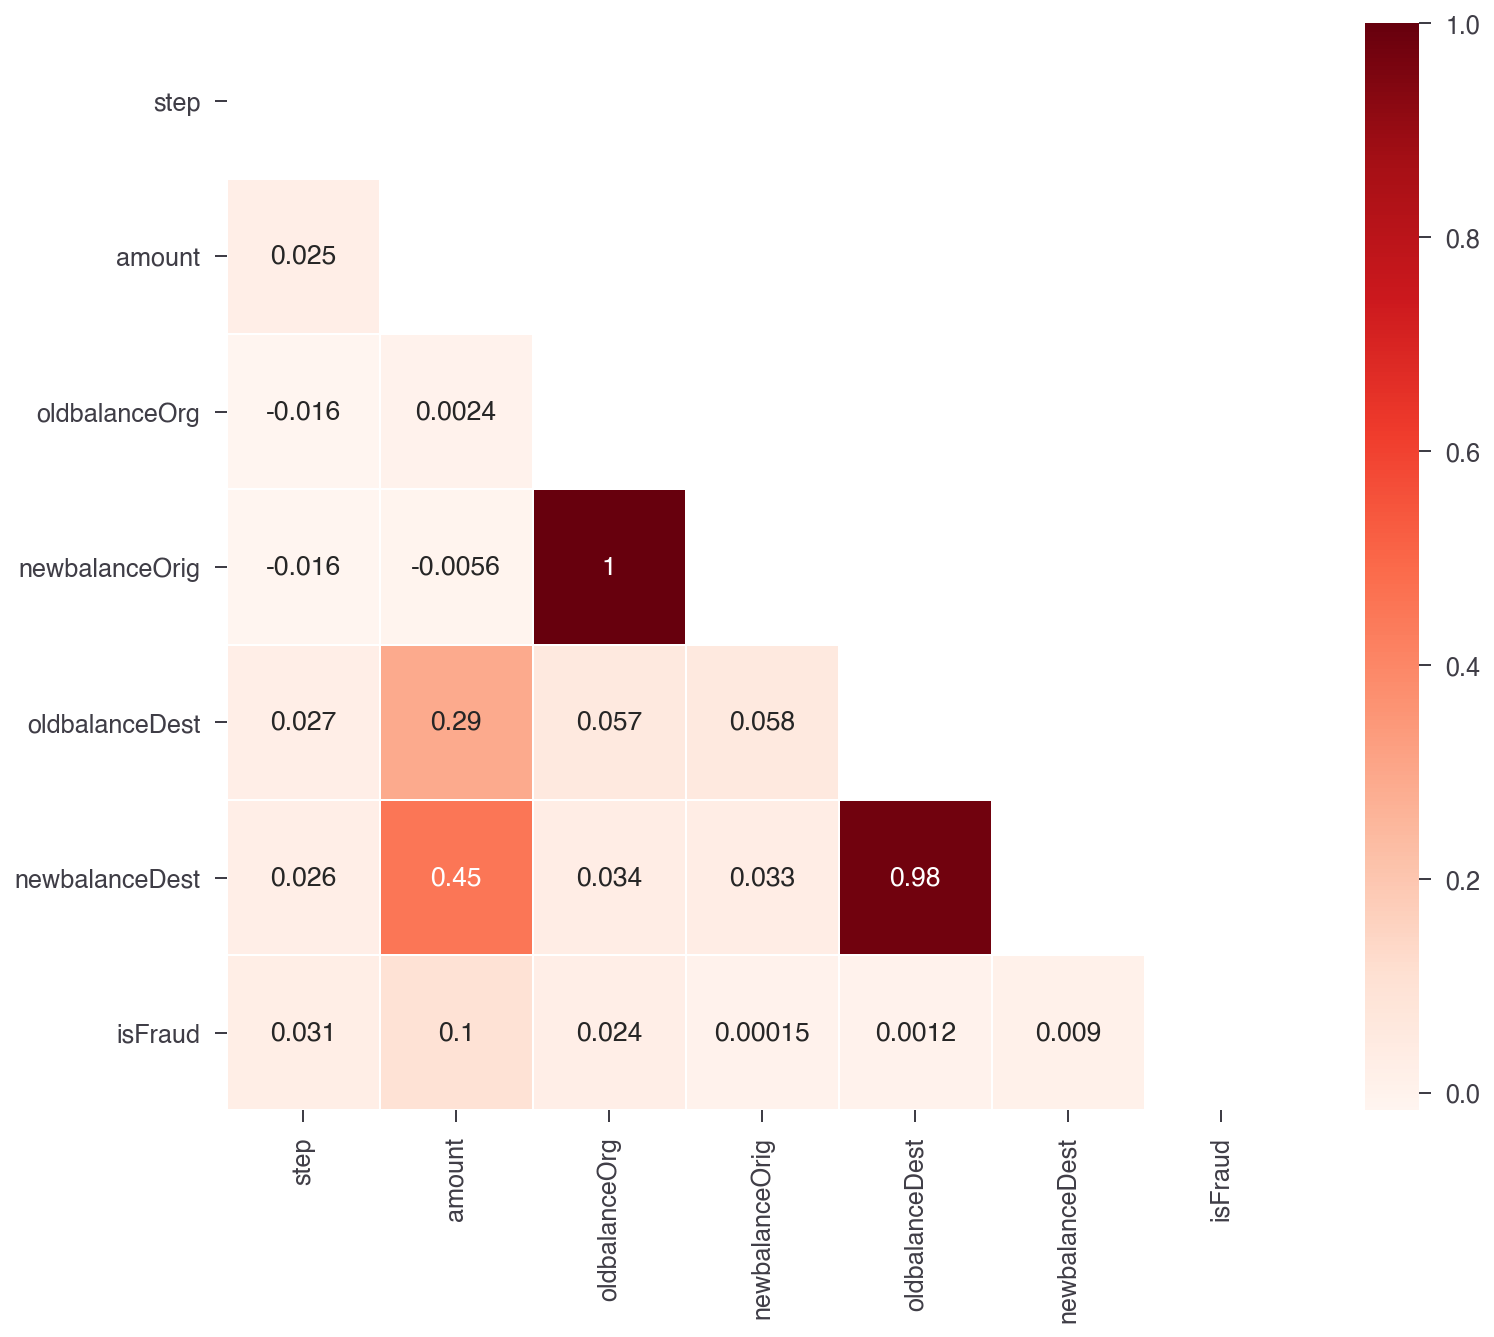

In [6]:
# Doing a heatmap just because, to better visualize
plt.figure(figsize = (12, 10))  # to increase the figure size
correlation = df.drop(columns = 'isFlaggedFraud').corr()  # dropping this col because it doesn't give us anything
mask = np.triu(np.ones_like(correlation, dtype = np.bool))  # to cut the duplicate part of the matrix
sns.heatmap(correlation, linewidths = 0.5, annot = True, mask = mask, cmap = 'Reds');  # the actual heatmap

### What is the distribution of the outcome? 

In [60]:
# Your response here
# Checking the distribution
df['isFraud'].value_counts() / df.shape[0] * 100  # 99.87% of the data is not fraudulent, only 0.13% is
# Since the data is binary, this is a bernoulli / binomial distribution, I suppose?

0    99.872
1     0.128
Name: isFraud, dtype: float64

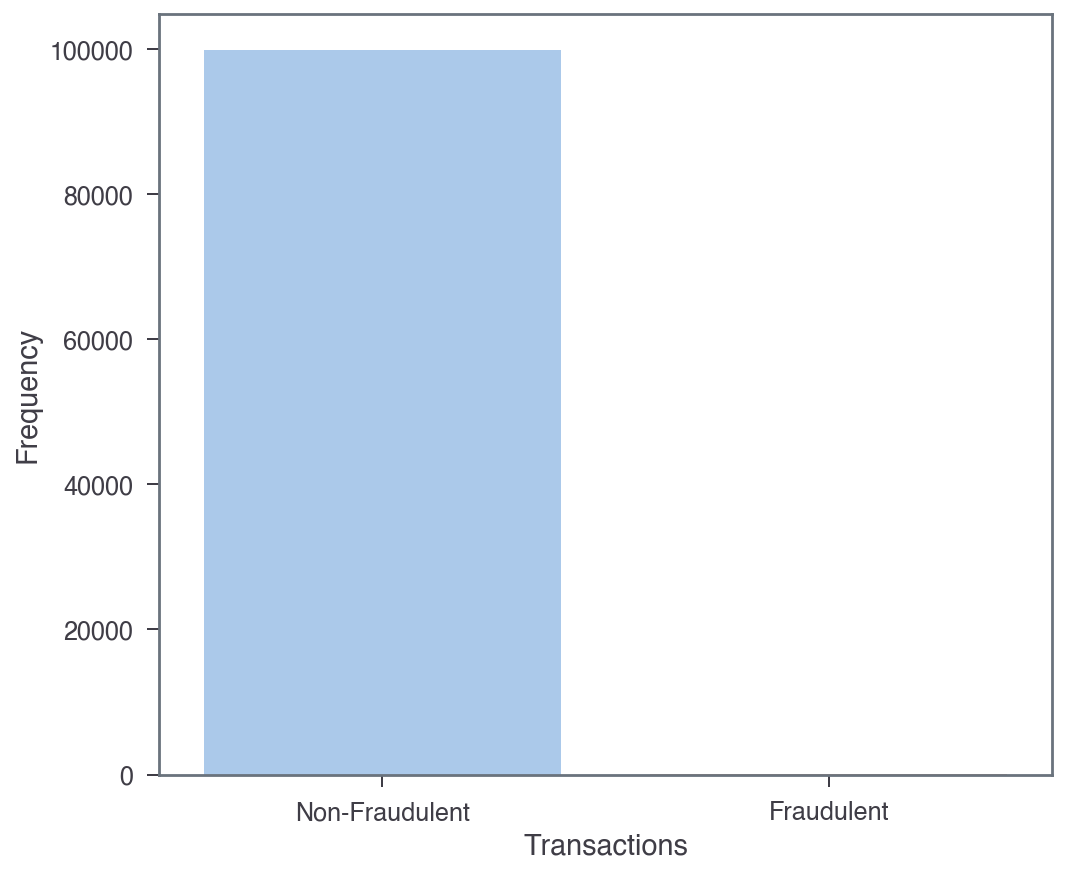

In [35]:
# Plotting the distribution of the data
uniques = df['isFraud'].value_counts().index
counts = df['isFraud'].value_counts()

#x = uniques
## decided to just put names instead of 0 and 1
sns.barplot(['Non-Fraudulent', 'Fraudulent'], y = counts, palette = 'pastel')
plt.xlabel('Transactions')
plt.ylabel('Frequency');

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [46]:
# Your code here
'''
I don't see the problem with step? It's just a variable that they made and it is coherent along the dataset,
since it stipulates the amount of time in the real world. 1 step = 1 hour.
'''

# Checking the object columns
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts(), '\n')

# Ok, since we have a huge amount of items in the other columns except 'type', I think that will not work well
# with the ML models, so I will drop them and encode the 'type' column

CASH_OUT    35268
PAYMENT     33558
CASH_IN     22009
TRANSFER     8449
DEBIT         716
Name: type, dtype: int64 

C2028306532    2
C1507611099    2
C1497516548    2
C26291584      1
C729251766     1
              ..
C1756693843    1
C789814494     1
C1109686724    1
C1198193986    1
C1652653619    1
Name: nameOrig, Length: 99997, dtype: int64 

C1394878885    5
C1671386208    5
C2059962142    5
C1675375648    5
C703469614     5
              ..
C220320579     1
M1942270998    1
C794861960     1
C916308174     1
C1143981429    1
Name: nameDest, Length: 92878, dtype: int64 



In [92]:
# Dropping these columns
df.drop(columns = ['nameOrig', 'nameDest'], inplace = True)

# Encoding the 'type' column
'''I have some doubts about encoding things, because it says in the documentation that this encoder should not be
used to encode the input 'X' data, and that it's only for the target - 'y' data'''
le = LabelEncoder()

# for some reason needs to be a DF and not series for the LE to work, hence the extra pair of []
df['type'] = df[['type']].apply(le.fit_transform)

df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,275,1,286775.55,196006.43,0.00,1161060.62,1447836.17,0,0
1,44,0,468059.29,1468755.32,1936814.61,2920874.74,2452815.45,0,0
2,355,0,342704.27,34050.00,376754.27,1011735.16,669030.89,0,0
3,369,1,119722.55,11287.00,0.00,4018330.88,4138053.43,0,0
4,349,1,224630.98,0.00,0.00,763527.93,988158.91,0,0
...,...,...,...,...,...,...,...,...,...
99995,205,4,1098483.22,90155.00,0.00,0.00,1098483.22,0,0
99996,314,2,1211.76,372189.00,370977.24,15845.52,17057.28,0,0
99997,253,1,3251.84,44340.53,41088.70,617019.09,620270.93,0,0
99998,10,0,229786.57,4308276.64,4538063.21,827100.38,1123551.97,0,0


In [93]:
# Checking the types again
df.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Run a logistic regression classifier and evaluate its accuracy.

In [102]:
# Your code here
X = df.drop(columns = 'isFraud')
y = df['isFraud']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test) * 100

# With and without (had to drop then) encoding the 'type' column the accuracy result was always the same - 99.72%
print('Logistic Regression test accuracy:', str(acc) + '%')
print(f'Logistic Regression test accuracy: {acc}%')  # tried just for fun, never used f-strings :D

Logistic Regression test accuracy: 99.72%
Logistic Regression test accuracy: 99.72%


### Now pick a model of your choice and evaluate its accuracy.

In [116]:
# Your code here
from sklearn.tree import DecisionTreeClassifier

# Decided to try this one cuz I had a good score in class :D
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predicting
y_pred = dtc.predict(X_test)  # for fun, not needed for accuracy

# Getting the accuracy
acc = dtc.score(X_test, y_test) * 100

# Printing the result
print(f'Decision Tree test accuracy: {round(acc, 2)}%')
# the value changes every time we run because the order of the decisiontree is different
## only changed very slightly though, from 99.91% to 99.94%

Decision Tree test accuracy: 99.94%


### Which model worked better and how do you know?

In [2]:
# Your response here
'''
Based on accuracy solely, the DecisionTreeClassifier had a better score. It achieved 99.94% accuracy vs 99.72% of the
LogisticRegression model.

However, maybe accuracy isn't the best metric to evaluate the model's performance?
Maybe we should look into Precison, Recall, or even F1 (used when we want to minimize both?), since it might be
very bad if we get lots of False Negatives, meaning the model classifies a transaction as negative (non-fraudulent),
when it actually is a fraudulent one.
'''

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.